# Working with JSON Data Tutorial
JSON, also known as JavaScript Object Notation, is a data-interchange text-serialization format

JSON is mainly built on two structures:
- A collection of key/value pairs. In Python, a key/value pair is referred to as a `Dictionary`, and a `key` is a unique attribute, whereas values are not.
- An ordered list of values. The ordered list can also sometimes be a list of lists. Lists in Python are a set of values which can be a string, integer, etc.

In [4]:
import pandas as pd
json = pd.read_json("data/tutorial_data.json")
json.head()

integer            datetime  category
0        5 2015-01-01 00:00:00         0
1        5 2015-01-01 00:00:01         0
2        9 2015-01-01 00:00:02         0
3        6 2015-01-01 00:00:03         0
4        6 2015-01-01 00:00:04         0

In [6]:
json.shape
#to_json() to write a json file

(100, 3)

In [9]:
# Double quotes here, meaning reading in as string
nested_json = """{
   "article": [

      {
         "id":"01",
         "language": "JSON",
         "edition": "first",
         "author": "Allen"
      },

      {
         "id":"02",
         "language": "Python",
         "edition": "second",
         "author": "Aditya Sharma"
      }
   ],

   "blog":[
   {
       "name": "Datacamp",
       "URL":"datacamp.com"
   }
   ]
}"""
import json
from pandas.io.json import json_normalize

nested = json.loads(nested_json)
nested

{'article': [{'id': '01',
   'language': 'JSON',
   'edition': 'first',
   'author': 'Allen'},
  {'id': '02',
   'language': 'Python',
   'edition': 'second',
   'author': 'Aditya Sharma'}],
 'blog': [{'name': 'Datacamp', 'URL': 'datacamp.com'}]}

In [13]:
nested_full = pd.json_normalize(nested)
nested_full

article  \
0  [{'id': '01', 'language': 'JSON', 'edition': '...   

                                            blog  
0  [{'name': 'Datacamp', 'URL': 'datacamp.com'}]

In [16]:
blog = pd.json_normalize(nested, record_path='blog')
blog

name           URL
0  Datacamp  datacamp.com

In [18]:
article = pd.json_normalize(nested, record_path='article')
article

id language edition         author
0  01     JSON   first          Allen
1  02   Python  second  Aditya Sharma

In [21]:
# No double quote here: reading as a file
nested_json = {
   "article": [

      {
         "id":"01",
         "language": "JSON",
         "edition": "first",
         "author": "Allen"
      },

      {
         "id":"02",
         "language": "Python",
         "edition": "second",
         "author": "Aditya Sharma"
      }
   ],

   "blog":[
   {
       "name": "Datacamp",
       "URL":"datacamp.com"
   }
   ]
}
json_file = pd.json_normalize(nested_json)
# json_file = pd.DataFrame.from_dict(pd.json_normalize(nested_json))
json_file

article  \
0  [{'id': '01', 'language': 'JSON', 'edition': '...   

                                            blog  
0  [{'name': 'Datacamp', 'URL': 'datacamp.com'}]

# Loading HTML Data
HTML is a Hypertext Markup Language that is mainly used for created web applications and pages. It tries to describe the structure of the web page semantically. The web browser receives an HTML document from a web server and renders it to a multimedia web page.

HTML is used with cascading style sheets (CSS)

To read an HTML file, `pandas` dataframe looks for a `tag`. That tag is called a `<td></td>` tag. This tag is used for defining a table in HTML.

`pandas` uses `read_html()` to read the HTML document.

In [41]:
import requests
url = 'https://www.worldcoinindex.com/'
crypto_url = requests.get(url)
crypto_url

<Response [200]>

In [42]:
crypto_data = pd.read_html(crypto_url.text)
crypto_data

[       # Unnamed: 1            Name Ticker  Last price       %     24 high  \
 0      1        NaN         Bitcoin    BTC    $ 10,294  -0.44%    $ 10,349   
 1      2        NaN        Ethereum    ETH    $ 359.11  -2.06%    $ 366.94   
 2      3        NaN   Yearn.finance    YFI    $ 35,376  -3.75%    $ 36,887   
 3      4        NaN       Chainlink   LINK     $ 11.81  -1.74%     $ 12.03   
 4      5        NaN             Eos    EOS      $ 2.70  -0.96%      $ 2.73   
 ..   ...        ...             ...    ...         ...     ...         ...   
 97    96        NaN       Bitshares    BTS  $ 0.029338  +0.26%  $ 0.029825   
 98    97        NaN       Uquidcoin    UQC      $ 3.34  -0.96%      $ 3.37   
 99    98        NaN           Storj  STORJ  $ 0.466839  -3.46%  $ 0.485175   
 100   99        NaN  Wrappedbitcoin   WBTC    $ 10,261  -0.56%    $ 10,330   
 101  100        NaN       Tokenclub    TCT  $ 0.015544  -2.38%  $ 0.016311   
 
          24 low Price Charts 7d  24 volume  # Coi

In [43]:
len(crypto_data), type(crypto_data)

(1, list)

In [44]:
crypto_data = crypto_data[0]
crypto_data

# Unnamed: 1            Name Ticker  Last price       %     24 high  \
0      1        NaN         Bitcoin    BTC    $ 10,294  -0.44%    $ 10,349   
1      2        NaN        Ethereum    ETH    $ 359.11  -2.06%    $ 366.94   
2      3        NaN   Yearn.finance    YFI    $ 35,376  -3.75%    $ 36,887   
3      4        NaN       Chainlink   LINK     $ 11.81  -1.74%     $ 12.03   
4      5        NaN             Eos    EOS      $ 2.70  -0.96%      $ 2.73   
..   ...        ...             ...    ...         ...     ...         ...   
97    96        NaN       Bitshares    BTS  $ 0.029338  +0.26%  $ 0.029825   
98    97        NaN       Uquidcoin    UQC      $ 3.34  -0.96%      $ 3.37   
99    98        NaN           Storj  STORJ  $ 0.466839  -3.46%  $ 0.485175   
100   99        NaN  Wrappedbitcoin   WBTC    $ 10,261  -0.56%    $ 10,330   
101  100        NaN       Tokenclub    TCT  $ 0.015544  -2.38%  $ 0.016311   

         24 low Price Charts 7d  24 volume  # Coins Market cap  
0      $ 10,291             NaN    $ 4.44B   18.48M  $ 190.32B  
1      $ 358.58             NaN    $ 3.72B  112.59M   $ 40.43B  
2      $ 35,281             NaN  $ 688.10M   30.00K    $ 1.06B  
3       $ 11.80             NaN  $ 684.39M  350.00M    $ 4.13B  
4        $ 2.70             NaN  $ 640.67M    1.01B    $ 2.75B  
..          ...             ...        ...      ...        ...  
97   $ 0.029261             NaN   $ 12.01M    2.49B   $ 73.28M  
98       $ 3.34             NaN   $ 11.54M      NaN        NaN  
99   $ 0.465517             NaN   $ 11.50M  102.97M   $ 48.07M  
100    $ 10,220             NaN   $ 11.07M      NaN        NaN  
101  $ 0.015541             NaN   $ 10.92M  481.42M    $ 7.48M  

[102 rows x 12 columns]

In [45]:
# Remove the first and second column 
crypto_final = crypto_data.iloc[:,2:]
crypto_final.head()

Name Ticker Last price       %   24 high    24 low  \
0        Bitcoin    BTC   $ 10,294  -0.44%  $ 10,349  $ 10,291   
1       Ethereum    ETH   $ 359.11  -2.06%  $ 366.94  $ 358.58   
2  Yearn.finance    YFI   $ 35,376  -3.75%  $ 36,887  $ 35,281   
3      Chainlink   LINK    $ 11.81  -1.74%   $ 12.03   $ 11.80   
4            Eos    EOS     $ 2.70  -0.96%    $ 2.73    $ 2.70   

  Price Charts 7d  24 volume  # Coins Market cap  
0             NaN    $ 4.44B   18.48M  $ 190.32B  
1             NaN    $ 3.72B  112.59M   $ 40.43B  
2             NaN  $ 688.10M   30.00K    $ 1.06B  
3             NaN  $ 684.39M  350.00M    $ 4.13B  
4             NaN  $ 640.67M    1.01B    $ 2.75B

In [46]:
del crypto_final['Price Charts 7d']
crypto_final.head()

Name Ticker Last price       %   24 high    24 low  24 volume  \
0        Bitcoin    BTC   $ 10,294  -0.44%  $ 10,349  $ 10,291    $ 4.44B   
1       Ethereum    ETH   $ 359.11  -2.06%  $ 366.94  $ 358.58    $ 3.72B   
2  Yearn.finance    YFI   $ 35,376  -3.75%  $ 36,887  $ 35,281  $ 688.10M   
3      Chainlink   LINK    $ 11.81  -1.74%   $ 12.03   $ 11.80  $ 684.39M   
4            Eos    EOS     $ 2.70  -0.96%    $ 2.73    $ 2.70  $ 640.67M   

   # Coins Market cap  
0   18.48M  $ 190.32B  
1  112.59M   $ 40.43B  
2   30.00K    $ 1.06B  
3  350.00M    $ 4.13B  
4    1.01B    $ 2.75B

In [47]:
crypto_final = crypto_final.dropna()
crypto_final

Name Ticker  Last price       %     24 high      24 low  \
0          Bitcoin    BTC    $ 10,294  -0.44%    $ 10,349    $ 10,291   
1         Ethereum    ETH    $ 359.11  -2.06%    $ 366.94    $ 358.58   
2    Yearn.finance    YFI    $ 35,376  -3.75%    $ 36,887    $ 35,281   
3        Chainlink   LINK     $ 11.81  -1.74%     $ 12.03     $ 11.80   
4              Eos    EOS      $ 2.70  -0.96%      $ 2.73      $ 2.70   
..             ...    ...         ...     ...         ...         ...   
92          Solana    SOL      $ 3.10  -5.17%      $ 3.27      $ 3.10   
94           Bytom    BTM  $ 0.075250  -0.85%  $ 0.076092  $ 0.075140   
97       Bitshares    BTS  $ 0.029338  +0.26%  $ 0.029825  $ 0.029261   
99           Storj  STORJ  $ 0.466839  -3.46%  $ 0.485175  $ 0.465517   
101      Tokenclub    TCT  $ 0.015544  -2.38%  $ 0.016311  $ 0.015541   

     24 volume  # Coins Market cap  
0      $ 4.44B   18.48M  $ 190.32B  
1      $ 3.72B  112.59M   $ 40.43B  
2    $ 688.10M   30.00K    $ 1.06B  
3    $ 684.39M  350.00M    $ 4.13B  
4    $ 640.67M    1.01B    $ 2.75B  
..         ...      ...        ...  
92    $ 12.84M   23.33M   $ 72.24M  
94    $ 12.32M  987.00M   $ 74.27M  
97    $ 12.01M    2.49B   $ 73.28M  
99    $ 11.50M  102.97M   $ 48.07M  
101   $ 10.92M  481.42M    $ 7.48M  

[73 rows x 9 columns]

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
crypto_final['%'] = crypto_final['%'].apply(lambda x: x.strip('%'))
crypto_final

Name Ticker  Last price      %     24 high      24 low  \
0          Bitcoin    BTC    $ 10,294  -0.44    $ 10,349    $ 10,291   
1         Ethereum    ETH    $ 359.11  -2.06    $ 366.94    $ 358.58   
2    Yearn.finance    YFI    $ 35,376  -3.75    $ 36,887    $ 35,281   
3        Chainlink   LINK     $ 11.81  -1.74     $ 12.03     $ 11.80   
4              Eos    EOS      $ 2.70  -0.96      $ 2.73      $ 2.70   
..             ...    ...         ...    ...         ...         ...   
92          Solana    SOL      $ 3.10  -5.17      $ 3.27      $ 3.10   
94           Bytom    BTM  $ 0.075250  -0.85  $ 0.076092  $ 0.075140   
97       Bitshares    BTS  $ 0.029338  +0.26  $ 0.029825  $ 0.029261   
99           Storj  STORJ  $ 0.466839  -3.46  $ 0.485175  $ 0.465517   
101      Tokenclub    TCT  $ 0.015544  -2.38  $ 0.016311  $ 0.015541   

     24 volume  # Coins Market cap  
0      $ 4.44B   18.48M  $ 190.32B  
1      $ 3.72B  112.59M   $ 40.43B  
2    $ 688.10M   30.00K    $ 1.06B  
3    $ 684.39M  350.00M    $ 4.13B  
4    $ 640.67M    1.01B    $ 2.75B  
..         ...      ...        ...  
92    $ 12.84M   23.33M   $ 72.24M  
94    $ 12.32M  987.00M   $ 74.27M  
97    $ 12.01M    2.49B   $ 73.28M  
99    $ 11.50M  102.97M   $ 48.07M  
101   $ 10.92M  481.42M    $ 7.48M  

[73 rows x 9 columns]

In [53]:
crypto_final['%'] = crypto_final['%'].apply(lambda x: x.strip('+'))
crypto_final

Name Ticker  Last price      %     24 high      24 low  \
0          Bitcoin    BTC    $ 10,294  -0.44    $ 10,349    $ 10,291   
1         Ethereum    ETH    $ 359.11  -2.06    $ 366.94    $ 358.58   
2    Yearn.finance    YFI    $ 35,376  -3.75    $ 36,887    $ 35,281   
3        Chainlink   LINK     $ 11.81  -1.74     $ 12.03     $ 11.80   
4              Eos    EOS      $ 2.70  -0.96      $ 2.73      $ 2.70   
..             ...    ...         ...    ...         ...         ...   
92          Solana    SOL      $ 3.10  -5.17      $ 3.27      $ 3.10   
94           Bytom    BTM  $ 0.075250  -0.85  $ 0.076092  $ 0.075140   
97       Bitshares    BTS  $ 0.029338   0.26  $ 0.029825  $ 0.029261   
99           Storj  STORJ  $ 0.466839  -3.46  $ 0.485175  $ 0.465517   
101      Tokenclub    TCT  $ 0.015544  -2.38  $ 0.016311  $ 0.015541   

     24 volume  # Coins Market cap  
0      $ 4.44B   18.48M  $ 190.32B  
1      $ 3.72B  112.59M   $ 40.43B  
2    $ 688.10M   30.00K    $ 1.06B  
3    $ 684.39M  350.00M    $ 4.13B  
4    $ 640.67M    1.01B    $ 2.75B  
..         ...      ...        ...  
92    $ 12.84M   23.33M   $ 72.24M  
94    $ 12.32M  987.00M   $ 74.27M  
97    $ 12.01M    2.49B   $ 73.28M  
99    $ 11.50M  102.97M   $ 48.07M  
101   $ 10.92M  481.42M    $ 7.48M  

[73 rows x 9 columns]

In [62]:
crypto_final['%'] = pd.to_numeric(crypto_final['%'],errors = "coerce").dropna()

In [63]:
crypto_final['%'] = crypto_final['%'].astype('float')

<Figure size 432x288 with 0 Axes>

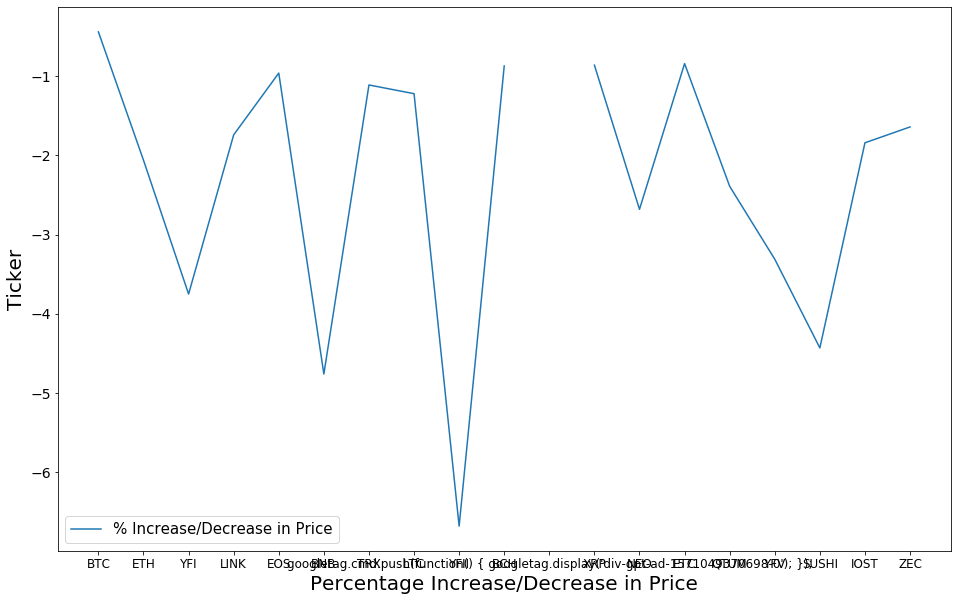

In [64]:
plt.figure()
plt.figure(figsize=(16,10))
x = crypto_final.iloc[:20]['Ticker']
y = crypto_final.iloc[:20]['%']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Percentage Increase/Decrease in Price',fontsize=20)
plt.ylabel('Ticker',fontsize=20)

plt.plot(x,y,label='% Increase/Decrease in Price')
plt.legend(loc='lower left',prop={'size': 15})

# Loading Pickle Data
Pickle is a Python-specific binary serialization format which is not human-readable, unlike JSON. It is used for serializing and deserializing an object structure of Python. It serializes the object and Pickles it to save it on a disk. It converts the object like DataFrame, list, dictionary, etc. into a character stream.
- Pickle is widely used for storing trained machine learning algorithm instances.
- Pickle also has handy functions like `pickle.load()` for loading a Pickle format file, and `pickle.dump()` for saving a Pickle or any other format in Pickle format.
- Another import advantage of using Pickle is that Saving the dataframe as a Pickle file required less space on the disk and keeps the type of the data intact when reloaded.

# Loading JSON Data Kaggle 
**Parsing Nested JSON with Pandasa**

Nested JSON files can be painful to flatten and load into Pandas. Follow along with this quick tutorial as:

- I use the nested '''raw_nyc_phil.json''' to create a flattened pandas datafram from one nested array
- You flatten another array.
- We unpack a deeply nested array

In [66]:
import json 
import pandas as pd 

#load json object
with open('data/raw_nyc_phil.json') as f:
    d = json.load(f)

# lets put the data into a pandas df
# clicking on raw_nyc_phil.json under "Input Files"
# tells us parent node is 'programs'
nycphil = pd.json_normalize(d['programs'])
nycphil.head(3)

season                                 orchestra  \
0  1842-43                     New York Philharmonic   
1  1842-43                     New York Philharmonic   
2  1842-43  Musicians from the New York Philharmonic   

                                            concerts programID  \
0  [{'Date': '1842-12-07T05:00:00Z', 'eventType':...      3853   
1  [{'Date': '1843-02-18T05:00:00Z', 'eventType':...      5178   
2  [{'Date': '1843-04-07T05:00:00Z', 'eventType':...     10785   

                                               works  \
0  [{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP....   
1  [{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR...   
2  [{'workTitle': 'EGMONT, OP.84', 'composerName'...   

                                     id  
0  38e072a7-8fc9-4f9a-8eac-3957905c0002  
1  c7b2b95c-5e0b-431c-a340-5b37fc860b34  
2  894e1a52-1ae5-4fa7-aec0-b99997555a37

In [69]:
works_data = pd.json_normalize(data = d['programs'], 
                               record_path='works',
                               meta=['id', 'orchestra', 'programID', 'season'])
works_data.head(3)

workTitle        conductorName      ID  \
0  SYMPHONY NO. 5 IN C MINOR, OP.67  Hill, Ureli Corelli  52446*   
1                            OBERON       Timm, Henry C.  8834*4   
2   QUINTET, PIANO, D MINOR, OP. 74                  NaN   3642*   

                                            soloists             composerName  \
0                                                 []  Beethoven,  Ludwig  van   
1  [{'soloistName': 'Otto, Antoinette', 'soloistR...  Weber,  Carl  Maria Von   
2  [{'soloistName': 'Scharfenberg, William', 'sol...          Hummel,  Johann   

                                            movement interval movement.em  \
0                                                NaN      NaN         NaN   
1  "Ozean, du Ungeheuer" (Ocean, thou mighty mons...      NaN         NaN   
2                                                NaN      NaN         NaN   

  movement._ workTitle.em workTitle._                                    id  \
0        NaN          NaN         NaN  38e072a7-8fc9-4f9a-8eac-3957905c0002   
1        NaN          NaN         NaN  38e072a7-8fc9-4f9a-8eac-3957905c0002   
2        NaN          NaN         NaN  38e072a7-8fc9-4f9a-8eac-3957905c0002   

               orchestra programID   season  
0  New York Philharmonic      3853  1842-43  
1  New York Philharmonic      3853  1842-43  
2  New York Philharmonic      3853  1842-43

In [72]:
concerts_data = pd.json_normalize(data = d['programs'], 
                                  record_path='concerts')
concerts_data.head(3)

Date            eventType         Venue       Location  \
0  1842-12-07T05:00:00Z  Subscription Season  Apollo Rooms  Manhattan, NY   
1  1843-02-18T05:00:00Z  Subscription Season  Apollo Rooms  Manhattan, NY   
2  1843-04-07T05:00:00Z              Special  Apollo Rooms  Manhattan, NY   

     Time  
0  8:00PM  
1  8:00PM  
2  8:00PM

In [75]:
soloist_data = pd.json_normalize(data = d['programs'], 
                                 record_path=['works', 'soloists'],
                                 meta = 'id')
soloist_data.head(3)

soloistName soloistRoles soloistInstrument  \
0       Otto, Antoinette            S           Soprano   
1  Scharfenberg, William            A             Piano   
2    Hill, Ureli Corelli            A            Violin   

                                     id  
0  38e072a7-8fc9-4f9a-8eac-3957905c0002  
1  38e072a7-8fc9-4f9a-8eac-3957905c0002  
2  38e072a7-8fc9-4f9a-8eac-3957905c0002

In [81]:
import json
import requests
users = requests.get("https://jsonplaceholder.typicode.com/users")
users = json.loads(users.text)

In [82]:
users

[{'id': 1,
  'name': 'Leanne Graham',
  'username': 'Bret',
  'email': 'Sincere@april.biz',
  'address': {'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'city': 'Gwenborough',
   'zipcode': '92998-3874',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'}},
  'phone': '1-770-736-8031 x56442',
  'website': 'hildegard.org',
  'company': {'name': 'Romaguera-Crona',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'bs': 'harness real-time e-markets'}},
 {'id': 2,
  'name': 'Ervin Howell',
  'username': 'Antonette',
  'email': 'Shanna@melissa.tv',
  'address': {'street': 'Victor Plains',
   'suite': 'Suite 879',
   'city': 'Wisokyburgh',
   'zipcode': '90566-7771',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'}},
  'phone': '010-692-6593 x09125',
  'website': 'anastasia.net',
  'company': {'name': 'Deckow-Crist',
   'catchPhrase': 'Proactive didactic contingency',
   'bs': 'synergize scalable supply-chains'}},
 {'id': 3,
  'name': 'Clementine Bauch',
  'username': 'Samantha

In [83]:
users[5]['company']['catchPhrase']

'Synchronised bottom-line interface'

In [89]:
users[9]['address']['geo']['lng']

'57.2232'

In [91]:
users[9]

{'id': 10,
 'name': 'Clementina DuBuque',
 'username': 'Moriah.Stanton',
 'email': 'Rey.Padberg@karina.biz',
 'address': {'street': 'Kattie Turnpike',
  'suite': 'Suite 198',
  'city': 'Lebsackbury',
  'zipcode': '31428-2261',
  'geo': {'lat': '-38.2386', 'lng': '57.2232'}},
 'phone': '024-648-3804',
 'website': 'ambrose.net',
 'company': {'name': 'Hoeger LLC',
  'catchPhrase': 'Centralized empowering task-force',
  'bs': 'target end-to-end models'}}

In [92]:
data1 = pd.DataFrame.from_records(users)
data1

id                      name          username                      email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
9  10        Clementina DuBuque    Moriah.Stanton     Rey.Padberg@karina.biz   

                                             address                  phone  \
0  {'street': 'Kulas Light', 'suite': 'Apt. 556',...  1-770-736-8031 x56442   
1  {'street': 'Victor Plains', 'suite': 'Suite 87...    010-692-6593 x09125   
2  {'street': 'Douglas Extension', 'suite': 'Suit...         1-463-123-4447   
3  {'street': 'Hoeger Mall', 'suite': 'Apt. 692',...      493-170-9623 x156   
4  {'street': 'Skiles Walks', 'suite': 'Suite 351...          (254)954-1289   
5  {'street': 'Norberto Crossing', 'suite': 'Apt....   1-477-935-8478 x6430   
6  {'street': 'Rex Trail', 'suite': 'Suite 280', ...           210.067.6132   
7  {'street': 'Ellsworth Summit', 'suite': 'Suite...      586.493.6943 x140   
8  {'street': 'Dayna Park', 'suite': 'Suite 449',...   (775)976-6794 x41206   
9  {'street': 'Kattie Turnpike', 'suite': 'Suite ...           024-648-3804   

         website                                            company  
0  hildegard.org  {'name': 'Romaguera-Crona', 'catchPhrase': 'Mu...  
1  anastasia.net  {'name': 'Deckow-Crist', 'catchPhrase': 'Proac...  
2    ramiro.info  {'name': 'Romaguera-Jacobson', 'catchPhrase': ...  
3       kale.biz  {'name': 'Robel-Corkery', 'catchPhrase': 'Mult...  
4   demarco.info  {'name': 'Keebler LLC', 'catchPhrase': 'User-c...  
5        ola.org  {'name': 'Considine-Lockman', 'catchPhrase': '...  
6       elvis.io  {'name': 'Johns Group', 'catchPhrase': 'Config...  
7   jacynthe.com  {'name': 'Abernathy Group', 'catchPhrase': 'Im...  
8     conrad.com  {'name': 'Yost and Sons', 'catchPhrase': 'Swit...  
9    ambrose.net  {'name': 'Hoeger LLC', 'catchPhrase': 'Central...

In [94]:
data2 = pd.json_normalize(users)
data2

id                      name          username                      email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
9  10        Clementina DuBuque    Moriah.Stanton     Rey.Padberg@karina.biz   

                   phone        website     address.street address.suite  \
0  1-770-736-8031 x56442  hildegard.org        Kulas Light      Apt. 556   
1    010-692-6593 x09125  anastasia.net      Victor Plains     Suite 879   
2         1-463-123-4447    ramiro.info  Douglas Extension     Suite 847   
3      493-170-9623 x156       kale.biz        Hoeger Mall      Apt. 692   
4          (254)954-1289   demarco.info       Skiles Walks     Suite 351   
5   1-477-935-8478 x6430        ola.org  Norberto Crossing      Apt. 950   
6           210.067.6132       elvis.io          Rex Trail     Suite 280   
7      586.493.6943 x140   jacynthe.com   Ellsworth Summit     Suite 729   
8   (775)976-6794 x41206     conrad.com         Dayna Park     Suite 449   
9           024-648-3804    ambrose.net    Kattie Turnpike     Suite 198   

     address.city address.zipcode address.geo.lat address.geo.lng  \
0     Gwenborough      92998-3874        -37.3159         81.1496   
1     Wisokyburgh      90566-7771        -43.9509        -34.4618   
2   McKenziehaven      59590-4157        -68.6102        -47.0653   
3     South Elvis      53919-4257         29.4572       -164.2990   
4      Roscoeview           33263        -31.8129         62.5342   
5   South Christy      23505-1337        -71.4197         71.7478   
6       Howemouth      58804-1099         24.8918         21.8984   
7       Aliyaview           45169        -14.3990       -120.7677   
8  Bartholomebury      76495-3109         24.6463       -168.8889   
9     Lebsackbury      31428-2261        -38.2386         57.2232   

         company.name                       company.catchPhrase  \
0     Romaguera-Crona    Multi-layered client-server neural-net   
1        Deckow-Crist            Proactive didactic contingency   
2  Romaguera-Jacobson         Face to face bifurcated interface   
3       Robel-Corkery  Multi-tiered zero tolerance productivity   
4         Keebler LLC      User-centric fault-tolerant solution   
5   Considine-Lockman        Synchronised bottom-line interface   
6         Johns Group        Configurable multimedia task-force   
7     Abernathy Group             Implemented secondary concept   
8       Yost and Sons     Switchable contextually-based project   
9          Hoeger LLC         Centralized empowering task-force   

                             company.bs  
0           harness real-time e-markets  
1      synergize scalable supply-chains  
2       e-enable strategic applications  
3  transition cutting-edge web services  
4      revolutionize end-to-end systems  
5      e-enable innovative applications  
6         generate enterprise e-tailers  
7         e-enable extensible e-tailers  
8      aggregate real-time technologies  
9              target end-to-end models

In [95]:
data1 = pd.json_normalize(users, max_level=0)
data1

id                      name          username                      email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
9  10        Clementina DuBuque    Moriah.Stanton     Rey.Padberg@karina.biz   

                                             address                  phone  \
0  {'street': 'Kulas Light', 'suite': 'Apt. 556',...  1-770-736-8031 x56442   
1  {'street': 'Victor Plains', 'suite': 'Suite 87...    010-692-6593 x09125   
2  {'street': 'Douglas Extension', 'suite': 'Suit...         1-463-123-4447   
3  {'street': 'Hoeger Mall', 'suite': 'Apt. 692',...      493-170-9623 x156   
4  {'street': 'Skiles Walks', 'suite': 'Suite 351...          (254)954-1289   
5  {'street': 'Norberto Crossing', 'suite': 'Apt....   1-477-935-8478 x6430   
6  {'street': 'Rex Trail', 'suite': 'Suite 280', ...           210.067.6132   
7  {'street': 'Ellsworth Summit', 'suite': 'Suite...      586.493.6943 x140   
8  {'street': 'Dayna Park', 'suite': 'Suite 449',...   (775)976-6794 x41206   
9  {'street': 'Kattie Turnpike', 'suite': 'Suite ...           024-648-3804   

         website                                            company  
0  hildegard.org  {'name': 'Romaguera-Crona', 'catchPhrase': 'Mu...  
1  anastasia.net  {'name': 'Deckow-Crist', 'catchPhrase': 'Proac...  
2    ramiro.info  {'name': 'Romaguera-Jacobson', 'catchPhrase': ...  
3       kale.biz  {'name': 'Robel-Corkery', 'catchPhrase': 'Mult...  
4   demarco.info  {'name': 'Keebler LLC', 'catchPhrase': 'User-c...  
5        ola.org  {'name': 'Considine-Lockman', 'catchPhrase': '...  
6       elvis.io  {'name': 'Johns Group', 'catchPhrase': 'Config...  
7   jacynthe.com  {'name': 'Abernathy Group', 'catchPhrase': 'Im...  
8     conrad.com  {'name': 'Yost and Sons', 'catchPhrase': 'Swit...  
9    ambrose.net  {'name': 'Hoeger LLC', 'catchPhrase': 'Central...

In [96]:
data2 = pd.json_normalize(users, max_level=1)
data2

id                      name          username                      email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
9  10        Clementina DuBuque    Moriah.Stanton     Rey.Padberg@karina.biz   

                   phone        website     address.street address.suite  \
0  1-770-736-8031 x56442  hildegard.org        Kulas Light      Apt. 556   
1    010-692-6593 x09125  anastasia.net      Victor Plains     Suite 879   
2         1-463-123-4447    ramiro.info  Douglas Extension     Suite 847   
3      493-170-9623 x156       kale.biz        Hoeger Mall      Apt. 692   
4          (254)954-1289   demarco.info       Skiles Walks     Suite 351   
5   1-477-935-8478 x6430        ola.org  Norberto Crossing      Apt. 950   
6           210.067.6132       elvis.io          Rex Trail     Suite 280   
7      586.493.6943 x140   jacynthe.com   Ellsworth Summit     Suite 729   
8   (775)976-6794 x41206     conrad.com         Dayna Park     Suite 449   
9           024-648-3804    ambrose.net    Kattie Turnpike     Suite 198   

     address.city address.zipcode                              address.geo  \
0     Gwenborough      92998-3874    {'lat': '-37.3159', 'lng': '81.1496'}   
1     Wisokyburgh      90566-7771   {'lat': '-43.9509', 'lng': '-34.4618'}   
2   McKenziehaven      59590-4157   {'lat': '-68.6102', 'lng': '-47.0653'}   
3     South Elvis      53919-4257   {'lat': '29.4572', 'lng': '-164.2990'}   
4      Roscoeview           33263    {'lat': '-31.8129', 'lng': '62.5342'}   
5   South Christy      23505-1337    {'lat': '-71.4197', 'lng': '71.7478'}   
6       Howemouth      58804-1099     {'lat': '24.8918', 'lng': '21.8984'}   
7       Aliyaview           45169  {'lat': '-14.3990', 'lng': '-120.7677'}   
8  Bartholomebury      76495-3109   {'lat': '24.6463', 'lng': '-168.8889'}   
9     Lebsackbury      31428-2261    {'lat': '-38.2386', 'lng': '57.2232'}   

         company.name                       company.catchPhrase  \
0     Romaguera-Crona    Multi-layered client-server neural-net   
1        Deckow-Crist            Proactive didactic contingency   
2  Romaguera-Jacobson         Face to face bifurcated interface   
3       Robel-Corkery  Multi-tiered zero tolerance productivity   
4         Keebler LLC      User-centric fault-tolerant solution   
5   Considine-Lockman        Synchronised bottom-line interface   
6         Johns Group        Configurable multimedia task-force   
7     Abernathy Group             Implemented secondary concept   
8       Yost and Sons     Switchable contextually-based project   
9          Hoeger LLC         Centralized empowering task-force   

                             company.bs  
0           harness real-time e-markets  
1      synergize scalable supply-chains  
2       e-enable strategic applications  
3  transition cutting-edge web services  
4      revolutionize end-to-end systems  
5      e-enable innovative applications  
6         generate enterprise e-tailers  
7         e-enable extensible e-tailers  
8      aggregate real-time technologies  
9              target end-to-end models

In [97]:
data3 = pd.json_normalize(users, max_level=2)
data3

id                      name          username                      email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
9  10        Clementina DuBuque    Moriah.Stanton     Rey.Padberg@karina.biz   

                   phone        website     address.street address.suite  \
0  1-770-736-8031 x56442  hildegard.org        Kulas Light      Apt. 556   
1    010-692-6593 x09125  anastasia.net      Victor Plains     Suite 879   
2         1-463-123-4447    ramiro.info  Douglas Extension     Suite 847   
3      493-170-9623 x156       kale.biz        Hoeger Mall      Apt. 692   
4          (254)954-1289   demarco.info       Skiles Walks     Suite 351   
5   1-477-935-8478 x6430        ola.org  Norberto Crossing      Apt. 950   
6           210.067.6132       elvis.io          Rex Trail     Suite 280   
7      586.493.6943 x140   jacynthe.com   Ellsworth Summit     Suite 729   
8   (775)976-6794 x41206     conrad.com         Dayna Park     Suite 449   
9           024-648-3804    ambrose.net    Kattie Turnpike     Suite 198   

     address.city address.zipcode address.geo.lat address.geo.lng  \
0     Gwenborough      92998-3874        -37.3159         81.1496   
1     Wisokyburgh      90566-7771        -43.9509        -34.4618   
2   McKenziehaven      59590-4157        -68.6102        -47.0653   
3     South Elvis      53919-4257         29.4572       -164.2990   
4      Roscoeview           33263        -31.8129         62.5342   
5   South Christy      23505-1337        -71.4197         71.7478   
6       Howemouth      58804-1099         24.8918         21.8984   
7       Aliyaview           45169        -14.3990       -120.7677   
8  Bartholomebury      76495-3109         24.6463       -168.8889   
9     Lebsackbury      31428-2261        -38.2386         57.2232   

         company.name                       company.catchPhrase  \
0     Romaguera-Crona    Multi-layered client-server neural-net   
1        Deckow-Crist            Proactive didactic contingency   
2  Romaguera-Jacobson         Face to face bifurcated interface   
3       Robel-Corkery  Multi-tiered zero tolerance productivity   
4         Keebler LLC      User-centric fault-tolerant solution   
5   Considine-Lockman        Synchronised bottom-line interface   
6         Johns Group        Configurable multimedia task-force   
7     Abernathy Group             Implemented secondary concept   
8       Yost and Sons     Switchable contextually-based project   
9          Hoeger LLC         Centralized empowering task-force   

                             company.bs  
0           harness real-time e-markets  
1      synergize scalable supply-chains  
2       e-enable strategic applications  
3  transition cutting-edge web services  
4      revolutionize end-to-end systems  
5      e-enable innovative applications  
6         generate enterprise e-tailers  
7         e-enable extensible e-tailers  
8      aggregate real-time technologies  
9              target end-to-end models

In [3]:
import requests 
r = requests.get("https://en.wikipedia.org/wiki/Wikipedia")
r

<Response [200]>

In [4]:
r = requests.get("https://www.virginia.edu/kazoosymphony")
r

<Response [404]>